# 나랑 닮은 연예인을 찾아보자

- 얼굴만 정확하게 인식해서 추출
- 얼굴 이미지는 Clustering, Similarity, Classification 등에 사용될 수 있음.
- dlib을 사용하여 만들어진 Face Recognition library 사용. (Object Detection 패키지)
- dlib은 이미 HOG(Histogram of Oriented Gradient) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾는 face detector 기능을 
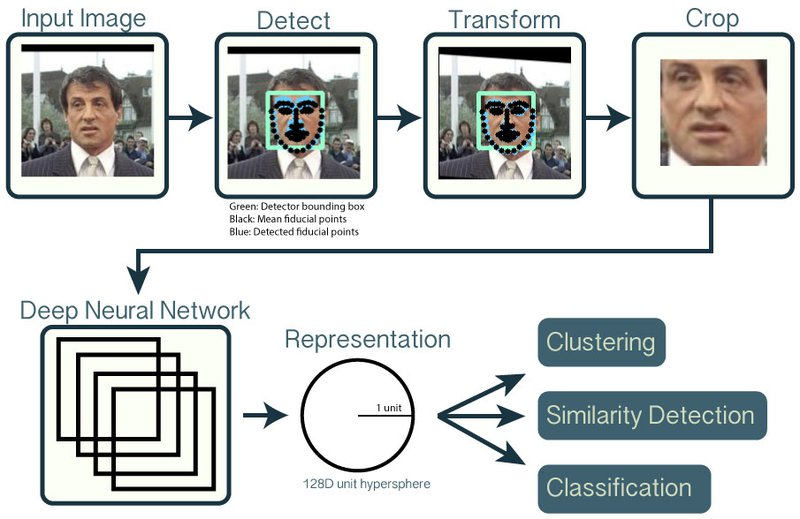
- [Face Recognition GitHub Repository](https://github.com/ageitgey/face_recognition)
   
   <br>
   <br>
   
## What is Embedding?
- Vector Space에 표현하고 싶은 정보를 mapping.
- 닮은 연예인을 찾는 문제 => 두 얼굴이 얼마나 닮았는지 (두 얼굴 벡터 사이의 거리를 따지는 일)
- embedding: 비교를 하기 위해 고차원 정보를 저차원으로 변환하여 중요한 feature들 보존하는 것
- [embedding for machine learning](https://cloud.google.com/solutions/machine-learning/overview-extracting-and-serving-feature-embeddings-for-machine-learning?hl=ko)
- 생화학 화합물, 소셜 네트워크, 기타 고차원 항목에 활용 가능


## Library

In [14]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
import face_recognition as fr
import numpy as np

## Functions
- get_gropped_face: 얼굴만 잘라주는 function
- get_face_embedding: 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
- get_face_embedding_dict: image path 안의 모든 이미지 파일의 embedding을 dict에 담아주는 함수
- get_sort_key_func: name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 
- get_nearest_face: embedding distance 정렬해서 출력
- get_distance: l2 norm distance

In [2]:
def get_gropped_face(image_file):
    image = fr.load_image_file(image_file)
    face_location = fr.face_locations(image)
    a,b,c,d=face_location[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [3]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [4]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [13]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [5]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [6]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

## Data Load

In [7]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['윤지현.jpg', 'obama.jpg', '연예인4.png', '윤지원1.jpg', '연예인9.png', '소정.png', '연예인1.png', '연예인3.png', '연예인2.png', 'bush.jpeg', '윤지현2.jpg', 'biden.jpg', '윤지원2.jpg', '연예인8.png', 'trump.jpg', 'clinton.jpeg', '연예인5.png', '연예인7.png', '연예인10.png']


## Data Check

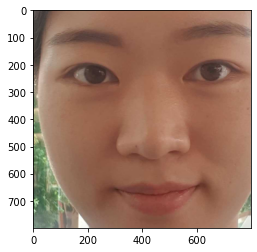

In [8]:
image_path = os.path.join(dir_path, '윤지원1.jpg')
cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

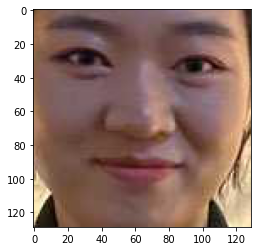

In [9]:
image_path = os.path.join(dir_path, '윤지원2.jpg')
cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

## Embedding Vector 생성
1. [FaceNet: A Unified Embedding for Face Recognition and Clustering](https://arxiv.org/abs/1503.03832)   
2. [Triplet Loss](https://www.youtube.com/watch?v=d2XB5-tuCWU)

In [10]:
image_file = os.path.join(dir_path, '윤지원1.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

embedding = get_face_embedding(face)  
embedding

[array([-0.1265077 ,  0.06108563,  0.00685236, -0.10624839, -0.09572838,
        -0.07454035, -0.05448715, -0.13758755,  0.10348798, -0.06636859,
         0.19153273, -0.11783642, -0.17801104, -0.11029377, -0.05975825,
         0.21869865, -0.21005674, -0.16477427, -0.04468211,  0.03127941,
         0.12122241,  0.00155039, -0.0219525 ,  0.09141414, -0.13119027,
        -0.32103345, -0.10282631, -0.05093672,  0.02815304, -0.03881976,
        -0.05780942,  0.06397302, -0.21565284, -0.04055894,  0.05204314,
         0.13665605,  0.02886196, -0.09859078,  0.14912559, -0.01633959,
        -0.27187935,  0.03860632,  0.11633304,  0.20459777,  0.18245804,
         0.02304581,  0.0425268 , -0.1494063 ,  0.08951978, -0.12626193,
        -0.00755663,  0.12580118,  0.07663149,  0.03646625,  0.00099767,
        -0.14819305,  0.02693094,  0.1284948 , -0.1662937 , -0.02047618,
         0.08671726, -0.0905278 , -0.04202052, -0.15713739,  0.23084296,
         0.08198255, -0.1241124 , -0.20254196,  0.1

In [11]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['윤지현']

array([-7.68212602e-02,  6.47927970e-02,  6.84101209e-02, -1.20851412e-01,
       -1.45941228e-01, -8.51653516e-02, -5.69123477e-02, -7.91003481e-02,
        1.82711214e-01, -1.70112669e-01,  1.98747605e-01, -1.22990623e-01,
       -1.59426093e-01,  2.05865689e-02, -3.50879095e-02,  2.73403436e-01,
       -1.93176761e-01, -1.19839571e-01, -8.67974386e-03,  5.54820057e-03,
        9.12246555e-02,  1.12652875e-01, -2.89524384e-02,  3.06985155e-02,
       -1.35197654e-01, -3.04776311e-01, -9.68212783e-02, -4.16694060e-02,
       -3.66859585e-02, -7.96592087e-02,  1.64868683e-02,  9.31682736e-02,
       -1.33407548e-01, -1.56031568e-02,  3.67376693e-02,  1.39368981e-01,
        5.79917338e-03, -1.40470847e-01,  1.38776377e-01,  3.19002047e-02,
       -3.37971836e-01,  3.37391645e-02,  8.89314413e-02,  2.48379722e-01,
        1.49311304e-01, -4.48796228e-02, -7.21776858e-04, -1.26511037e-01,
        6.89749271e-02, -1.91146642e-01, -6.44327551e-02,  5.22109121e-02,
        8.44500773e-03,  

## Embedding Distance Measurement
- Triplet Loss에 의하면, 같은 사람의 얼굴은 서로 가깝게, 다른 사람의 얼굴은 멀게 학습이 됨.
- L2 Norm distance로 계산
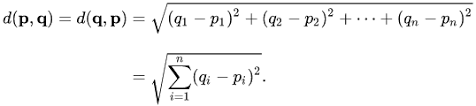   
- [임베딩 공간의 시각화](https://huyhoang17.github.io/128D-Facenet-LFW-Embedding-Visualisation/)

<br>

- 다차원 벡터 시각화하기 위한 차원축소: PCA, T-SNE   <br>
- [PCA(Principal Component Analysis)](https://bcho.tistory.com/1209?category=555440): 모든 차원의 축에 따른 값의 변화도인 분산(Variance)를 확인한 뒤 그 중 변화가 가장 큰 주요한 축을 남기는 방법   <br>
- [T-SNE](https://www.youtube.com/watch?v=NEaUSP4YerM): 고차원 상에서 먼 거리를 저차원 상에서도 멀리 배치되도록 차원을 축소하는 방식. random하게 목표하는 차원에 데이터들을 배치한 후 각 데이터들을 고차원 상에서의 배치와 비교를 하면서 위치를 변경해 주는 알고리즘

In [15]:
get_distance('윤지원1', '윤지현')

0.48990517413349727

In [16]:
sort_key_func = get_sort_key_func('윤지원1')

In [17]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('윤지원1',
  array([-0.1265077 ,  0.06108563,  0.00685236, -0.10624839, -0.09572838,
         -0.07454035, -0.05448715, -0.13758755,  0.10348798, -0.06636859,
          0.19153273, -0.11783642, -0.17801104, -0.11029377, -0.05975825,
          0.21869865, -0.21005674, -0.16477427, -0.04468211,  0.03127941,
          0.12122241,  0.00155039, -0.0219525 ,  0.09141414, -0.13119027,
         -0.32103345, -0.10282631, -0.05093672,  0.02815304, -0.03881976,
         -0.05780942,  0.06397302, -0.21565284, -0.04055894,  0.05204314,
          0.13665605,  0.02886196, -0.09859078,  0.14912559, -0.01633959,
         -0.27187935,  0.03860632,  0.11633304,  0.20459777,  0.18245804,
          0.02304581,  0.0425268 , -0.1494063 ,  0.08951978, -0.12626193,
         -0.00755663,  0.12580118,  0.07663149,  0.03646625,  0.00099767,
         -0.14819305,  0.02693094,  0.1284948 , -0.1662937 , -0.02047618,
          0.08671726, -0.0905278 , -0.04202052, -0.15713739,  0.23084296,
          0.08198255, -0.124

In [18]:
get_nearest_face('윤지원1')

순위 1 : 이름(윤지원2), 거리(0.25889568147983566)
순위 2 : 이름(소정), 거리(0.37924859865899574)
순위 3 : 이름(윤지현2), 거리(0.38956231918176754)
순위 4 : 이름(연예인8), 거리(0.44085781019891634)
순위 5 : 이름(연예인3), 거리(0.44334140890114715)


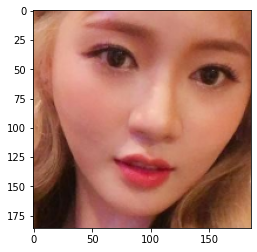

In [22]:
image_path = os.path.join(dir_path, '소정.png')
cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

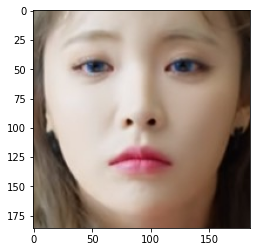

In [23]:
image_path = os.path.join(dir_path, '연예인8.png')
cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

## Conclusion
- 신기하게 평소에 친구들이 닮았다고 말하던 연예인이 동생보다 더 닮았다고 나왔다.
- 좀 더 많은 샘플을 활용한다면 재밌는 결과가 나올 것 같다